In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:11<00:00, 2287581.52it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 206903.44it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3899618.84it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20983748.29it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

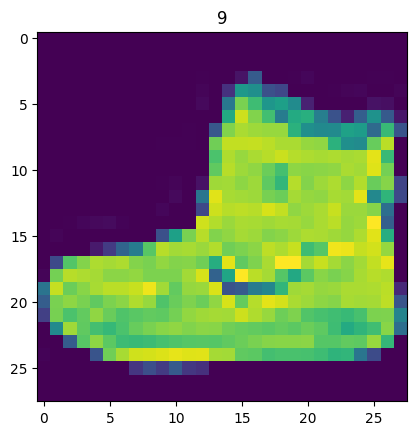

In [10]:
print(image.shape)
plt.imshow(image.squeeze())
plt.title(label)

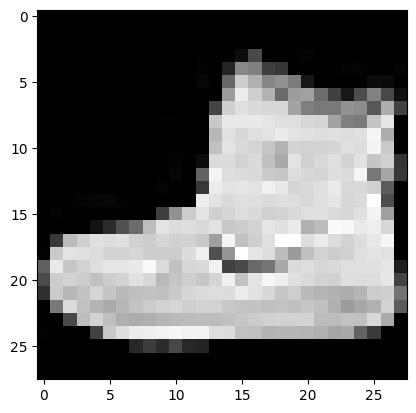

In [11]:
plt.imshow(image.squeeze(),cmap="gray")


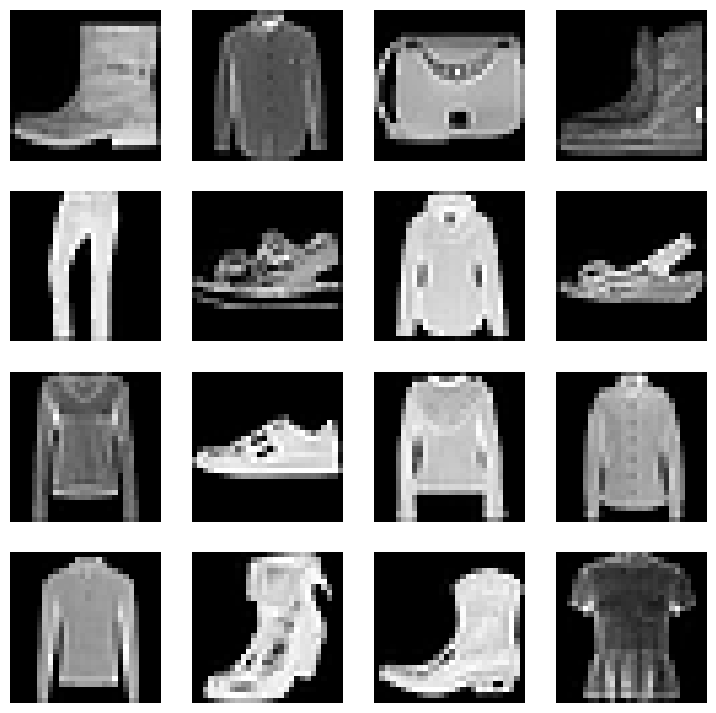

In [12]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  #plt.title(class_names[label])
  plt.axis(False)

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [14]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7ea2ab1d7d30>,
 <torch.utils.data.dataloader.DataLoader at 0x7ea2aad9e9b0>)

In [15]:
len(train_dataloader)

1875

In [16]:
train_feature_batch, train_label_batch=next(iter(train_dataloader))
train_feature_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


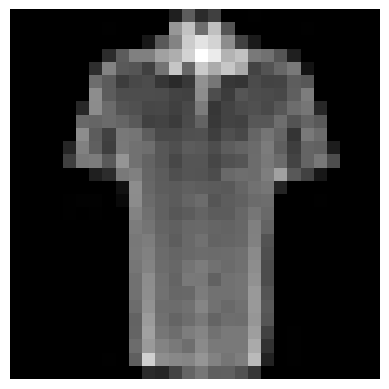

In [17]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_feature_batch),size=[1]).item()
img, label = train_feature_batch[random_idx], train_feature_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.axis(False)
print(img.shape)
print(label.shape)


In [18]:
flatten_model = nn.Flatten()

x = train_feature_batch[0]
x.shape

torch.Size([1, 28, 28])

In [19]:
output = flatten_model(x)
output.shape

torch.Size([1, 784])

In [20]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units
                  ),
        nn.Linear(in_features=hidden_units,
                  out_features = output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)


In [21]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape = 784,
    hidden_units = 10,
    output_shape = len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [23]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [24]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [25]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [26]:
from timeit  import default_timer as timer
#copied
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [27]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(epoch)
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /=len(train_dataloader)
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred = model_0(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
      test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
      test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.00099, Test acc: 0.28%

1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.00089, Test acc: 0.30%

2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.00106, Test acc: 0.30%

Train time on cpu: 32.417 seconds


In [28]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [29]:
!nvidia-smi

Thu Jun 13 06:36:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [30]:
torch.cuda.is_available()

True

In [31]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [32]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units
                  ),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)


In [33]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(
    input_shape = 784,
    hidden_units = 10,
    output_shape = len(class_names)
).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [34]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [35]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):
  train_loss = 0; train_acc = 0
  model.train()
  for batch, (X,y) in enumerate(data_loader):
    X,y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /=len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [36]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [37]:
from timeit import default_timer as timer
torch.manual_seed(42)
train_time_start_on_gpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(epoch)
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

  train_time_end_on_gpu = timer()
  total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                             end=train_time_end_on_gpu,
                                             device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

0
Train loss: 1.09199 | Train acc: 0.00%
Test loss: 0.95636 | Test acc: 65.00%

Train time on cuda: 10.098 seconds
1
Train loss: 0.78101 | Train acc: 0.00%
Test loss: 0.72227 | Test acc: 73.91%

Train time on cuda: 19.989 seconds
2
Train loss: 0.67027 | Train acc: 0.00%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 31.573 seconds


In [38]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## delibrate error

In [39]:
# model_1_results = eval_model(model=model_1,
#                              data_loader = test_dataloader,
#                              loss_fn= loss_fn,
#                              accuracy_fn = accuracy_fn,
#                              device=device)
# model_1_results

In [40]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [41]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    print(f'Output shape of conv block 1:{x.shape}')
    x = self.conv_block_2(x)
    print(f'Output shape of conv block 2:{x.shape}')
    x = self.classifier(x)
    print(f'Output shape of classifier:{x.shape}')
    return x


In [42]:
image.shape

torch.Size([1, 28, 28])

In [43]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [44]:
rand_image_tensor = torch.rand(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [45]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

Output shape of conv block 1:torch.Size([1, 10, 14, 14])
Output shape of conv block 2:torch.Size([1, 10, 7, 7])
Output shape of classifier:torch.Size([1, 10])


tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [46]:
torch.manual_seed(42)
images = torch.rand(size=(32,3,64,64))
test_image = images[0]
print(image.shape)
print(test_image.shape)

torch.Size([1, 28, 28])
torch.Size([3, 64, 64])


In [47]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [48]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1
                       )
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [49]:
torch.__version__

'2.3.0+cu121'

In [50]:
#maxpool
test_image.shape

torch.Size([3, 64, 64])

In [51]:
print(test_image.shape)
print(test_image.unsqueeze(dim=0).shape)

maxpool_layer = nn.MaxPool2d(kernel_size=2)
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(test_image_through_conv.shape)
test_image_through_conv_and_maxpool = maxpool_layer(test_image_through_conv)
print(test_image_through_conv_and_maxpool.shape)


torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64])
torch.Size([1, 10, 64, 64])
torch.Size([1, 10, 32, 32])


In [52]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")
max_pool_layer = nn.MaxPool2d(kernel_size=2)


max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max pool tensor:\n{max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])
Max pool tensor:
tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


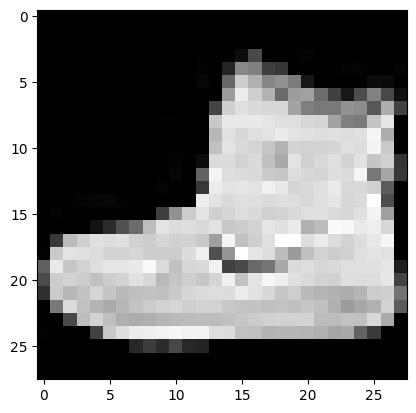

In [53]:
plt.imshow(image.squeeze(), cmap="gray")

In [54]:
rand_image_tesnor = torch.randn(size=(1,28,28))
rand_image_tesnor.shape

torch.Size([1, 28, 28])

In [55]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [56]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [57]:
#7.4
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from timeit import default_timer as timer
train_time_start_model_2 = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(epoch)
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn = loss_fn,
             optimizer=optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                             end=train_time_end_model_2,
                                             device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torc

In [58]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3195078670978546,
 'model_acc': 88.29872204472844}

In [59]:
#8
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.319508,88.298722


In [60]:
compare_results["training_time"] = [total_train_time_model_0,
                                     total_train_time_model_1,
                                     total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,32.416682
1,FashionMNISTModelV1,0.685001,75.019968,31.572736
2,FashionMNISTModelV2,0.319508,88.298722,52.784251


Text(0, 0.5, 'model')

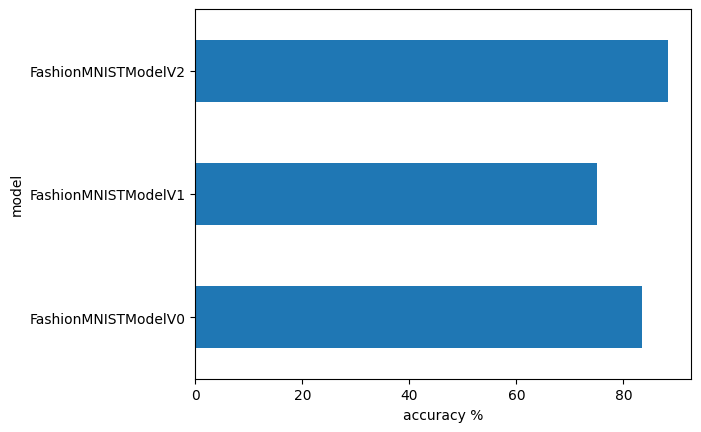

In [61]:
#visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy %")
plt.ylabel("model")

In [62]:
#make and evalate aranodm prediiotn wiht best model
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [63]:
import random
test_samples = []
test_labels = []
random.seed(42)
for sample, label in random.sample(list(test_data), k =9):
  test_samples.append(sample)
  test_labels.append(label)
  print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [64]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

Output shape of conv block 1:torch.Size([1, 10, 14, 14])
Output shape of conv block 2:torch.Size([1, 10, 7, 7])
Output shape of classifier:torch.Size([1, 10])
Output shape of conv block 1:torch.Size([1, 10, 14, 14])
Output shape of conv block 2:torch.Size([1, 10, 7, 7])
Output shape of classifier:torch.Size([1, 10])
Output shape of conv block 1:torch.Size([1, 10, 14, 14])
Output shape of conv block 2:torch.Size([1, 10, 7, 7])
Output shape of classifier:torch.Size([1, 10])
Output shape of conv block 1:torch.Size([1, 10, 14, 14])
Output shape of conv block 2:torch.Size([1, 10, 7, 7])
Output shape of classifier:torch.Size([1, 10])
Output shape of conv block 1:torch.Size([1, 10, 14, 14])
Output shape of conv block 2:torch.Size([1, 10, 7, 7])
Output shape of classifier:torch.Size([1, 10])
Output shape of conv block 1:torch.Size([1, 10, 14, 14])
Output shape of conv block 2:torch.Size([1, 10, 7, 7])
Output shape of classifier:torch.Size([1, 10])
Output shape of conv block 1:torch.Size([1, 10

tensor([[1.6780e-07, 1.2950e-07, 1.7718e-07, 1.7811e-07, 8.7851e-08, 9.9981e-01,
         1.7934e-06, 1.5924e-05, 1.8157e-05, 1.5738e-04],
        [2.0683e-02, 8.3587e-01, 4.7477e-04, 6.7320e-02, 1.9620e-02, 4.3104e-05,
         5.4846e-02, 5.8160e-04, 4.3548e-04, 1.2941e-04]])

In [65]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [66]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

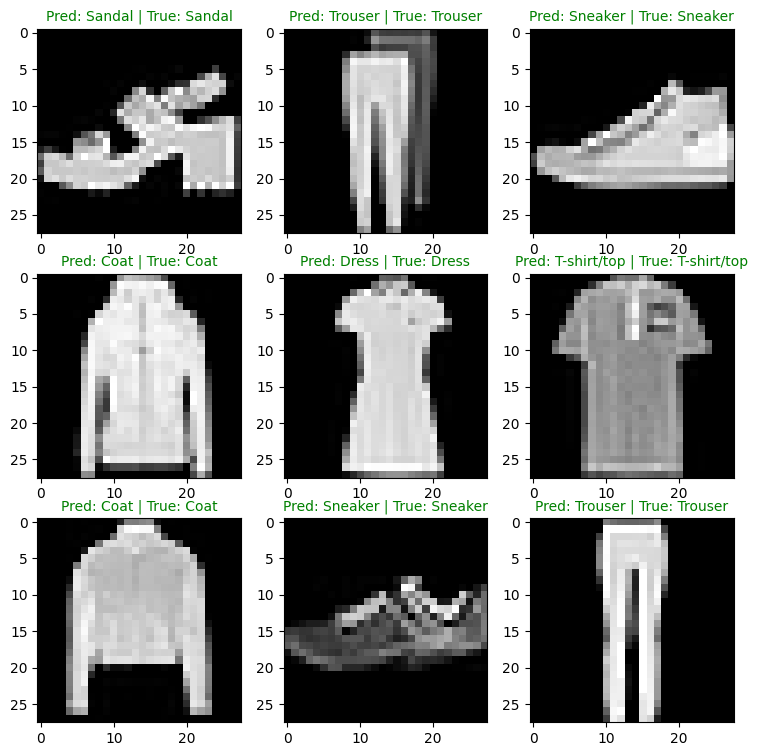

In [67]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  true_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | True: {true_label}"
  if pred_label == true_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")



In [69]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logits = model_2(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
  #print(y_preds)
  y_pred_tensor =  torch.cat(y_preds)
  y_pred_tensor[:10]

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1

In [72]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"

except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 61.7 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [73]:
import mlxtend
print(mlxtend.__version__)

0.23.1


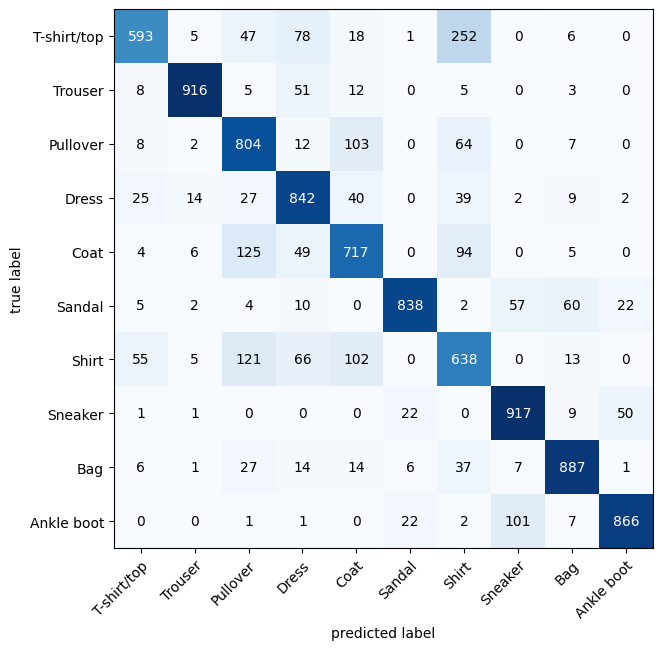

In [81]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)


In [78]:
confmat_tensor

tensor([[593,   5,  47,  78,  18,   1, 252,   0,   6,   0],
        [  8, 916,   5,  51,  12,   0,   5,   0,   3,   0],
        [  8,   2, 804,  12, 103,   0,  64,   0,   7,   0],
        [ 25,  14,  27, 842,  40,   0,  39,   2,   9,   2],
        [  4,   6, 125,  49, 717,   0,  94,   0,   5,   0],
        [  5,   2,   4,  10,   0, 838,   2,  57,  60,  22],
        [ 55,   5, 121,  66, 102,   0, 638,   0,  13,   0],
        [  1,   1,   0,   0,   0,  22,   0, 917,   9,  50],
        [  6,   1,  27,  14,  14,   6,  37,   7, 887,   1],
        [  0,   0,   1,   1,   0,  22,   2, 101,   7, 866]])

In [82]:
#save and load
from pathlib import Path
MODEL_PATH = Path("/content/drive/MyDrive/PyTorch/03._PyTorch_Computer_Vision")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


In [83]:
image_shape = [1,28,28]

In [84]:
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [85]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3195078670978546,
 'model_acc': 88.29872204472844}

In [86]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1:torch.Size([32, 10, 14, 14])
Output shape of conv block 2:torch.Size([32, 10, 7, 7])
Output shape of classifier:torch.Size([32, 10])
Output shape of conv block 1

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3195078670978546,
 'model_acc': 88.29872204472844}

In [88]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)